## EXERCICE 10 : PLS

inspire de http://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_compare_cross_decomposition.html


In [1]:
import numpy as np
from numpy import random

import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression


### Partie 1 : regression PLS avec reponse univariee (PLS1)


In [2]:
#On va supposer que l'on veut mettre en lien les notes d'étudiants dans différentes 
#matières (notes) à celles obtenus par les mêmes étudiants à un concours en fin d'année (y)

#GENERATION DE DONNEES SIMULEES
n = 500
p = 7

cov=np.array(
[[0.2 , 0.5  , 0.5 , 0   , 0   , 0.  , 0  ],
[0.5  , 0.2  , 0.5 , 0   , 0   , 0   , 0.],
[0.5  , 0.5  , 0.2  , 0.  , 0   , 0   , 0  ],
[0.   , 0    , 0.  , 1.2 , 0.8 , 0   , 0  ],
[0.   , 0    , 0   , 0.8 , 1.5 , 0   , 0  ],
[0.   , 0    , 0   , 0   , 0   , 0.2  , 0.9],
[0.   , 0.0  , 0   , 0   , 0   , 0.9 , 0.2]]
)

mean = np.array([12,11,13,12,10,9,8.])

notes=np.round(random.multivariate_normal(mean, 4*cov, size=n),1)

notes[notes<0.]=0.
notes[notes>20.]=20.

theta=np.array([0.5,0.00,0.0,0.00,0.00,0.25,0.25])
y = np.round(np.dot(notes,theta.reshape(-1,1)) + np.random.normal(size=n).reshape(-1,1),1)
           
print(notes)
print(y.transpose())
     
    


[[13.8 13.5 17.1 ... 10.1  5.4  7.8]
 [14.4 15.  15.1 ... 11.4  8.1  7.1]
 [13.1 10.5 15.9 ...  7.4  9.2  7.9]
 ...
 [10.1 11.  10.1 ...  6.9  4.1  5.5]
 [11.2  8.3  9.6 ...  9.7  8.2  8.7]
 [ 8.1 10.2 12.4 ...  6.7  7.5  7. ]]
[[11.1 12.6 11.4  9.7  8.3  7.6  8.1 11.7  7.1  8.8 11.6 11.3 10.3  9.7
   9.6  9.2 10.7 10.2 12.  10.3 12.1 11.1 11.  11.4  9.1  9.5 10.7  9.9
  11.4  9.5 10.2  8.3 11.5 11.5 10.3 11.8  8.6  8.9  9.3 10.2  8.7  9.8
  12.1  8.8  8.  12.2  8.3  6.4  9.9  8.8 10.8  8.7  8.9  9.1 10.7 11.3
  12.7 10.4  8.5 11.9  9.9  8.8  8.   8.2 10.4 10.  10.9 10.3 13.2 11.2
  10.1  9.   9.1 12.9  9.1 10.9 12.5 10.6  9.9 10.1 11.5  9.8 11.3  9.8
  11.3 10.7 10.5 10.2 12.3 11.4 10.3  8.9 11.3  9.1 10.4 11.6 11.6 10.4
  11.7  9.1  8.9  9.6  9.7  8.9 12.5  9.9 12.5 13.2  9.5  9.8  8.4  9.2
   7.9 11.8 10.3 10.4  9.6  9.8  9.9  9.4  6.1  9.  10.9 10.6  7.5  9.6
  10.9  9.3 11.2  9.5  8.5  9.4  7.3  8.3 11.1 13.6  9.  10.1 12.5  7.2
   7.6  8.5 12.4 13.4  9.6 11.7  9.3  9.1  8.1 12.  

/tmp/ipykernel_2175126/3990020790.py:20: RuntimeWarning: covariance is not positive-semidefinite.
  notes=np.round(random.multivariate_normal(mean, 4*cov, size=n),1)


##### QUESTION 1: 
- Comment sont construites les donnees simulees ? 
- Que vous attendez-vous a voir dans la PLS


On utilise une loi normale : notes=np.round(random.multivariate_normal(mean, 4*cov, size=n),1)

On s'attend à voir 3 groupes (matières 1,2,3 puis matières 4,5 et enfin 6,7).

In [3]:

pls1 = PLSRegression(n_components=7)
pls1.fit(notes, y)



PLSRegression(n_components=7)

##### QUESTION 2 : 
- Quelle est la signification de pls1.x_rotations_. 
- Comment interpretez vous ses valeurs ?


In [4]:
print(pls1.x_rotations_)

[[ 6.24340635e-01 -3.14700309e-01  8.72067372e-01  9.38097666e-03
   8.54063199e-02 -5.80226239e-02  8.27456437e-04]
 [ 3.73749374e-01  4.30550734e-01 -3.95743838e-01  1.49157687e-02
   3.07148881e-02 -3.57321268e-01 -6.80578104e-01]
 [ 3.36836427e-01  4.80066683e-01 -3.46754021e-01  7.38801776e-02
   1.11216340e-01  2.44038020e-01  7.09934977e-01]
 [-4.14750365e-02 -1.97182858e-01  4.79718525e-02  8.03721077e-01
   4.41850104e-03 -3.72925248e-01  3.91413722e-02]
 [-5.69458536e-02 -8.00951977e-02 -9.55763051e-02 -5.23157646e-01
   1.08942186e+00  8.13117039e-02  3.47640980e-02]
 [ 4.03367017e-01 -5.31500905e-01 -2.47176627e-01 -2.35945512e-01
  -1.88850043e-01 -5.24765830e-01  2.08443138e-01]
 [ 4.35182076e-01 -4.90838646e-01 -1.80723834e-01  1.63216710e-01
   7.31817367e-02  6.60796924e-01 -1.51467422e-01]]


In [ ]:
# C'est la matrice de projection de X

##### QUESTION 3 : 
- Observez les projections de X sur les deux premiers axes de pls1.x_rotations_ . 
- Pouvez-vous definir des profils etudiants a partir de cette projection de X ?


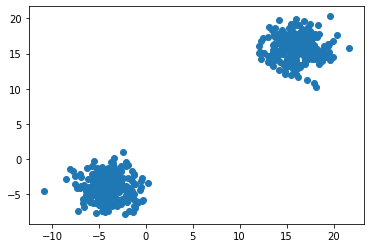

In [21]:
X_proj = np.dot(notes,np.transpose(pls1.x_rotations_[0:2]))
#print(X_proj.transpose())
X_proj = np.reshape(X_proj,(2,500))
#print(X_proj)
#print(X_proj.shape)
plt.scatter(X_proj[0],X_proj[1])